In [1]:
# Data handling
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer

# Model Training
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model Saving
import joblib


In [61]:
"""
import os

# Check if files exist
print("Train file exists:", os.path.exists("data/train.txt"))
print("Validation file exists:", os.path.exists("data/val.txt"))
print("Test file exists:", os.path.exists("data/test.txt"))

print("Current working directory:", os.getcwd())  # Show current directory

# List files in the data folder
print("Files in data folder:", os.listdir("data"))"""


'\nimport os\n\n# Check if files exist\nprint("Train file exists:", os.path.exists("data/train.txt"))\nprint("Validation file exists:", os.path.exists("data/val.txt"))\nprint("Test file exists:", os.path.exists("data/test.txt"))\n\nprint("Current working directory:", os.getcwd())  # Show current directory\n\n# List files in the data folder\nprint("Files in data folder:", os.listdir("data"))'

In [2]:
# Load train, validation, and test datasets
train_data = pd.read_csv("data/train.txt", delimiter=";", header=None, names=["text", "emotion"])
val_data = pd.read_csv("data/val.txt", delimiter=";", header=None, names=["text", "emotion"])
test_data = pd.read_csv("data/test.txt", delimiter=";", header=None, names=["text", "emotion"])

# Print sample data from each set
print("Train Data:\n", train_data.head(), "\n")
print("Validation Data:\n", val_data.head(), "\n")
print("Test Data:\n", test_data.head(), "\n")

# Check the size of each dataset
print(f"Train Set: {len(train_data)} samples")
print(f"Validation Set: {len(val_data)} samples")
print(f"Test Set: {len(test_data)} samples")

Train Data:
                                                 text  emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger 

Validation Data:
                                                 text  emotion
0  im feeling quite sad and sorry for myself but ...  sadness
1  i feel like i am still looking at a blank canv...  sadness
2                     i feel like a faithful servant     love
3                  i am just feeling cranky and blue    anger
4  i can have for a treat or if i am feeling festive      joy 

Test Data:
                                                 text  emotion
0  im feeling rather rotten so im not very ambiti...  sadness
1          im updating my blog because i feel shitty  sadness
2  i never make her sep

In [3]:
train_data['emotion'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emotion, dtype: int64

In [4]:
test_data['emotion'].value_counts()

joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: emotion, dtype: int64

In [5]:
val_data['emotion'].value_counts()

joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: emotion, dtype: int64

In [6]:
# Text Processing
import neattext as nt
import neattext.functions as nfx
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [7]:
train_data['text'] = train_data['text'].apply(nfx.remove_userhandles)
test_data['text'] = test_data['text'].apply(nfx.remove_userhandles)
val_data['text'] = val_data['text'].apply(nfx.remove_userhandles)

In [8]:
# Download NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
# Define stopwords set
stop_words = set(stopwords.words('english'))

# Function for text preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = nfx.remove_puncts(text)  # Remove punctuation
    words = word_tokenize(text)  # Tokenization
    text = " ".join([word for word in words if word not in stop_words])  # Remove stopwords
    return text

# Apply preprocessing
train_data["text"] = train_data["text"].apply(preprocess_text)
val_data["text"] = val_data["text"].apply(preprocess_text)
test_data["text"] = test_data["text"].apply(preprocess_text)




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rraja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rraja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rraja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [9]:
# Display cleaned text
print(train_data.head())
print(test_data.head())
print(val_data.head())

                                                text  emotion
0                              didnt feel humiliated  sadness
1  go feeling hopeless damned hopeful around some...  sadness
2          im grabbing minute post feel greedy wrong    anger
3  ever feeling nostalgic fireplace know still pr...     love
4                                    feeling grouchy    anger
                                                text  emotion
0        im feeling rather rotten im ambitious right  sadness
1                       im updating blog feel shitty  sadness
2    never make separate ever want feel like ashamed  sadness
3  left bouquet red yellow tulips arm feeling sli...      joy
4                            feeling little vain one  sadness
                                                text  emotion
0           im feeling quite sad sorry ill snap soon  sadness
1  feel like still looking blank canvas blank pie...  sadness
2                         feel like faithful servant     love
3       

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text into TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=5000)  # Keep only the top 5000 words
X_train = vectorizer.fit_transform(train_data["text"])  # Fit and transform train data
X_val = vectorizer.transform(val_data["text"])  # Transform validation data
X_test = vectorizer.transform(test_data["text"])  # Transform test data

# Target Variable (Emotion Labels)
y_train = train_data["emotion"]
y_val = val_data["emotion"]
y_test = test_data["emotion"]


In [12]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression Model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Evaluate on validation data
val_predictions = model.predict(X_val)


In [13]:
from sklearn.metrics import accuracy_score, classification_report

# Check accuracy on validation set
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Show detailed performance report
print(classification_report(y_val, val_predictions))


Validation Accuracy: 0.88
              precision    recall  f1-score   support

       anger       0.90      0.84      0.87       275
        fear       0.85      0.77      0.81       212
         joy       0.87      0.95      0.91       704
        love       0.89      0.72      0.80       178
     sadness       0.88      0.94      0.91       550
    surprise       0.86      0.62      0.72        81

    accuracy                           0.88      2000
   macro avg       0.88      0.81      0.83      2000
weighted avg       0.88      0.88      0.87      2000



In [14]:
from sklearn.svm import SVC

# Train SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate accuracy
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.885
              precision    recall  f1-score   support

       anger       0.88      0.89      0.89       275
        fear       0.85      0.86      0.86       224
         joy       0.89      0.94      0.91       695
        love       0.79      0.72      0.75       159
     sadness       0.93      0.91      0.92       581
    surprise       0.73      0.62      0.67        66

    accuracy                           0.89      2000
   macro avg       0.85      0.82      0.83      2000
weighted avg       0.88      0.89      0.88      2000



In [15]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate accuracy
print(" Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


 Random Forest Accuracy: 0.887


In [16]:
from sklearn.naive_bayes import MultinomialNB

# Train Naïve Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate accuracy
print(" Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


 Naïve Bayes Accuracy: 0.754


In [17]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Encode target labels to numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_encoded)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Convert predictions back to original labels
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb)

# Evaluate accuracy
from sklearn.metrics import accuracy_score
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


C:\pyhton3.11\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:42:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.889


In [18]:
print(" Model Performance Comparison:")
print(f"Logistic Regression: {accuracy_score(y_val, val_predictions):.4f}")
print(f"SVM: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Naïve Bayes: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Random Forest: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"XGBoost: {accuracy_score(y_test, y_pred_xgb):.4f}")


 Model Performance Comparison:
Logistic Regression: 0.8770
SVM: 0.8850
Naïve Bayes: 0.7540
Random Forest: 0.8870
XGBoost: 0.8890


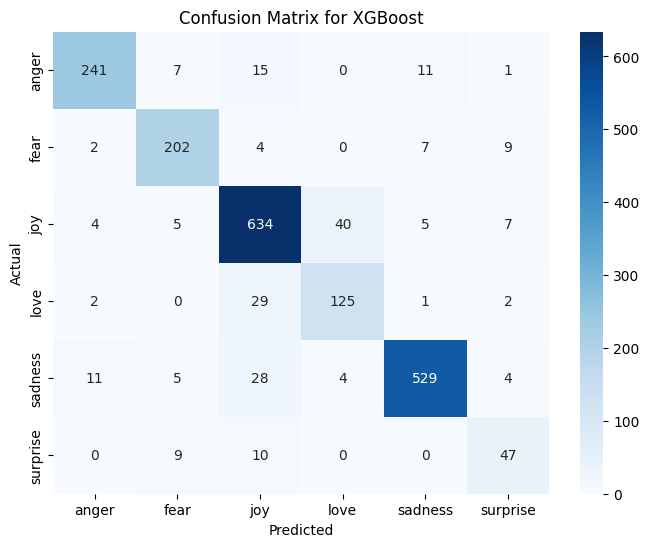

 Classification Report:
              precision    recall  f1-score   support

       anger       0.93      0.88      0.90       275
        fear       0.89      0.90      0.89       224
         joy       0.88      0.91      0.90       695
        love       0.74      0.79      0.76       159
     sadness       0.96      0.91      0.93       581
    surprise       0.67      0.71      0.69        66

    accuracy                           0.89      2000
   macro avg       0.84      0.85      0.85      2000
weighted avg       0.89      0.89      0.89      2000



In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix for the best model (e.g., XGBoost)
cm = confusion_matrix(y_test, y_pred_xgb, labels=label_encoder.classes_)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGBoost")
plt.show()

# Print Classification Report
print(" Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))


In [20]:
import joblib

# Save the model
joblib.dump(rf_model, "random_forest_emotion_model.pkl")

# Save the vectorizer (TF-IDF)
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


In [26]:
# Load model and vectorizer
rf_model = joblib.load("random_forest_emotion_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Predict on new text
new_text = ["i know it so difficult especially when you feel you have been wronged" ]  # Example input
new_text_vectorized = vectorizer.transform(new_text)

predicted_emotion = rf_model.predict(new_text_vectorized)
print("📝 Predicted Emotion:", predicted_emotion[0])


📝 Predicted Emotion: sadness
